### Principal Component Analysis (PCA)

The main purposes of a principal component analysis are the analysis of data to reduce the dimensions of the dataset with minimal loss of information.


the idea of PCA is simple — reduce the number of variables(columns) of a data set, while preserving as much information as possible.

##### **The main goal of a PCA analysis is to identify patterns in data;** 


**PCA aims to detect the correlation between variables.**


**If a strong correlation between variables exists, the attempt to reduce the dimensionality only makes sense.**


**this is what PCA is all about: Finding the directions of maximum variance in high-dimensional data and project it onto a smaller dimensional subspace while retaining most of the information**

### What is variance?

**The variance measures the spread of the data**

- In Figure 1 (a), the points have a high variance because they are spread out, 


-  but in Figure 1 (b), the points have a low variance because they are close together.

<img src='images/var1.PNG' width='60%' height='60%'/>

### Suppose We have data which is spread in a shape that roughly looks like an ellipse. 

<img src='images/var2.PNG' width='30%' height='30%'/>

This direction, represented by the blue line in Figure 3, is called the first principal component of the data.
Because it is the direction of maximum information/Variance.


The second principal component is the second direction with most variance perpendicular to the direction of the first principal component. In 2D, there is only one direction that is perpendicular to the first principal component, and so that is the second principal component. This is shown in Figure 3 using a green line.

### What are Eigen vectors and Eigen values of a matrix?

- An eigenvector represents a direction

- Each eigenvector is associated with an eigenvalue, which tell us about the "length" or "magnitude" of the eigenvector.

- An eigenvalue is a number, which tell us how much variance there is in the data in that direction.

- The eigenvector with the highest eigenvalue is therefore the principal component.

- The principal components of a matrix are the eigenvectors of its covariance matrix, ordered by their corresponding eigenvalues.

- The eigenvector with the greatest eigenvalue is the first principal component; the second principal component is the eigenvector with the second greatest eigenvalue, and so on.

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
iris = load_iris()

X = iris.data
y = iris.target

In [3]:
std = StandardScaler()
x_std=std.fit_transform(X)
x_std.max()

3.0907752482994253

In [4]:
x_std.shape

(150, 4)

### Calculate the Covariance matrix

- we want to find the direction of maximum variance. 


- The covariance matrix captures the information about the spread of the data.


- a square matrix that contains the variances and covariances


- The main diagonal elements of the matrix contain the variances of the variables and the off diagonal elements contain the covariances between all possible pairs of variables.


<img src='images/cov.png' width='50%' height='50%' />

In [5]:
cov = np.cov(x_std.T)

In [6]:
cov

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

<img src='images/cov1.png' width='30%' height='30%'/>

In [7]:
np.matmul(x_std.T ,x_std)/150

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

### find eigenvalues and eigenvectors

In [8]:
eig_vals,eig_vecs = np.linalg.eig(cov)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]

Eigenvalues 
[2.93808505 0.9201649  0.14774182 0.02085386]


### Explained Variance

**The explained variance tells us how much information (variance) can be attributed to each of the principal components.**

####  Find how much variance or information hold by first eigen vector 

In [ ]:
eig_vals

In [ ]:
eig_vals[0]/np.sum(eig_vals)

In [ ]:
d=[]
for i,v in enumerate(eig_vals,start=1):
    c=v/np.sum(eig_vals)
    d.append(c)
    print('%d Eigen vector'%i,c)

In [ ]:
np.sum(d)

In [ ]:
pd.Series(d,index=['EV1','EV2','EV3','EV4']).plot(kind='bar',rot=45)

In [ ]:
#sort the eigenvalues in descending order
eig_pairs = [(np.abs(eig_vals[i]),eig_vecs[:,i])for i in range(len(eig_vals))]
for i in eig_pairs:
    print (i[0])

In [ ]:
for i in eig_pairs:
    print(i)

In [ ]:
### Projection Onto the New Feature Space
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1)))

print  (matrix_w)


In [ ]:
matrix_w.shape

In [ ]:
x_std.shape

In [ ]:
X_new=x_std.dot(matrix_w)

In [ ]:
X_new.shape

In [ ]:
plt.scatter(X_new[:,0],X_new[:,1],c=y)
plt.xlabel('PC1')
plt.ylabel('PC2')

### PCA using Scikit-Learn

In [9]:
from sklearn.decomposition import PCA
pca = PCA(.95)

In [10]:

pca_data = pca.fit_transform(x_std)
# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)


shape of pca_reduced.shape =  (150, 2)


In [11]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [12]:
pca.explained_variance_

array([2.93808505, 0.9201649 ])

Text(0, 0.5, 'PC2')

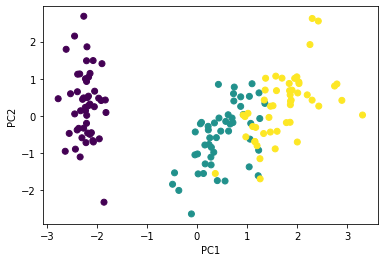

In [13]:
plt.scatter(pca_data[:,0],pca_data[:,1],c=y)
plt.xlabel('PC1')
plt.ylabel('PC2')

In [15]:
from sklearn.datasets import fetch_openml

In [16]:
mnist=fetch_openml('mnist_784')

In [17]:
mnist.data.shape

(70000, 784)

In [18]:
d=mnist.data

In [19]:
import matplotlib.pyplot as plt

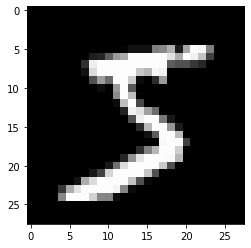

In [20]:
plt.imshow(d[0].reshape(28,28),cmap="gray")

In [21]:
std=StandardScaler()

In [22]:
X_new = std.fit_transform(d[:10000])

In [23]:
X_new.shape

(10000, 784)

In [24]:
# from sklearn.decomposition import PCA
pca=PCA(.95)

In [25]:
X1=pca.fit_transform(X_new)

In [26]:
X1.shape

(10000, 283)

In [27]:
X_inv=pca.inverse_transform(X1)

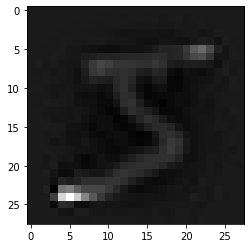

In [28]:
plt.imshow(X_inv[0].reshape(28,28),cmap="gray")

In [29]:
d.max()

255.0

In [30]:
d.min()

0.0

In [31]:
d1=d/255.0
d1.max()

1.0

### Return Correlation Matrix

In [32]:
from sklearn.datasets import load_diabetes
import pandas as pd
d = load_diabetes()
df = pd.DataFrame(d.data, columns=d.feature_names)
df.head()

age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019908 -0.017646  
1 -0.039493 -0.068330 -0.092204  
2 -0.002592  0.002864 -0.025930  
3  0.034309  0.022692 -0.009362  
4 -0.002592 -0.031991 -0.046641

In [33]:
df.corr()

age       sex       bmi        bp        s1        s2        s3  \
age  1.000000  0.173737  0.185085  0.335427  0.260061  0.219243 -0.075181   
sex  0.173737  1.000000  0.088161  0.241013  0.035277  0.142637 -0.379090   
bmi  0.185085  0.088161  1.000000  0.395415  0.249777  0.261170 -0.366811   
bp   0.335427  0.241013  0.395415  1.000000  0.242470  0.185558 -0.178761   
s1   0.260061  0.035277  0.249777  0.242470  1.000000  0.896663  0.051519   
s2   0.219243  0.142637  0.261170  0.185558  0.896663  1.000000 -0.196455   
s3  -0.075181 -0.379090 -0.366811 -0.178761  0.051519 -0.196455  1.000000   
s4   0.203841  0.332115  0.413807  0.257653  0.542207  0.659817 -0.738493   
s5   0.270777  0.149918  0.446159  0.393478  0.515501  0.318353 -0.398577   
s6   0.301731  0.208133  0.388680  0.390429  0.325717  0.290600 -0.273697   

           s4        s5        s6  
age  0.203841  0.270777  0.301731  
sex  0.332115  0.149918  0.208133  
bmi  0.413807  0.446159  0.388680  
bp   0.257653  0.393478  0.390429  
s1   0.542207  0.515501  0.325717  
s2   0.659817  0.318353  0.290600  
s3  -0.738493 -0.398577 -0.273697  
s4   1.000000  0.617857  0.417212  
s5   0.617857  1.000000  0.464670  
s6   0.417212  0.464670  1.000000